In [1]:
# (1). Clone YOLOv5 & Install
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

!pip install -r requirements.txt # install YOLOv5 dependencies

!pip install roboflow # download dataset from cloud

Cloning into 'yolov5'...
remote: Enumerating objects: 17516, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 17516 (delta 6), reused 0 (delta 0), pack-reused 17497 (from 4)
Receiving objects: 100% (17516/17516), 16.61 MiB | 26.95 MiB/s, done.
Resolving deltas: 100% (11994/11994), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta

In [2]:
# (2). Import Libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import display

In [3]:
from google.colab import drive
drive.mount('/content/drive')

save_path = '/content/drive/MyDrive/leaves_recognition'
os.makedirs(save_path, exist_ok=True)

print(f"📂 Folder is ready to use: {save_path}")

Mounted at /content/drive
📂 Folder is ready to use: /content/drive/MyDrive/leaves_recognition


In [4]:
# (3). Download Dataset from Roboflow

from roboflow import Roboflow

rf = Roboflow(api_key="OsYzbmtKBCoa5rD1VOT6")
project = rf.workspace("fracture-caci8").project("daunsyauki")
version = project.version(2)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to daunsyauki-2 in yolov5pytorch:: 100%|██████████| 7173/7173 [00:01<00:00, 5372.29it/s]


In [6]:
!wandb disabled

W&B disabled.


In [9]:
!ls data/hyps

hyp.no-augmentation.yaml  hyp.scratch-high.yaml  hyp.scratch-med.yaml
hyp.Objects365.yaml	  hyp.scratch-low.yaml	 hyp.VOC.yaml


In [10]:
# (4). Start Training
%cd /content/yolov5

!python train.py --img 640 --batch 16 --epochs 150 \
--data daunsyauki-2/data.yaml \
--weights yolov5m.pt \
--name leaves_trainingPERTAMA \
--project /content/drive/MyDrive/leaves_recognition \
--patience 10 \
--hyp hyp.scratch-low.yaml

Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
      8/149      7.35G    0.04898    0.05339   0.003925         85        640:  11% 22/207 [00:10<02:05,  1.48it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      8/149      7.35G    0.04907    0.05279   0.003857         79        640:  11% 23/207 [00:11<01:51,  1.65it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      8/149      7.35G    0.04915    0.05287   0.003831        110        640:  12% 24/207 [00:11<01:48,  1.68it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp

In [ ]:
# (5). Visualization

OUTPUT_DIR = "/content/drive/MyDrive/leaves_recognition/leaves_training3"

def show_img(title, path, size=(10,10)):
    plt.figure(figsize=size)
    plt.axis('off')
    plt.title(title)
    plt.imshow(plt.imread(path))
    plt.show()

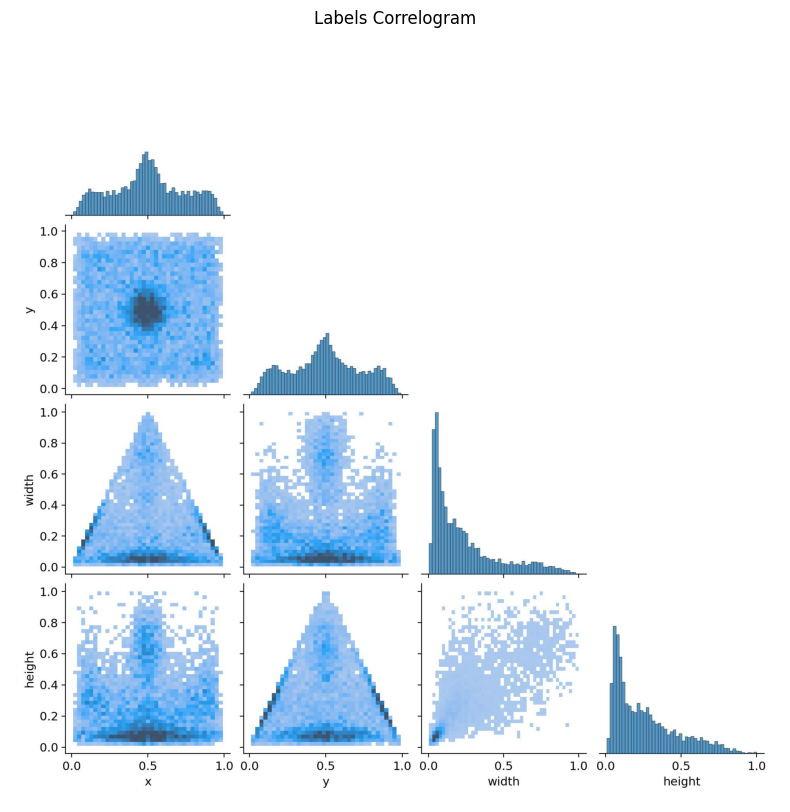

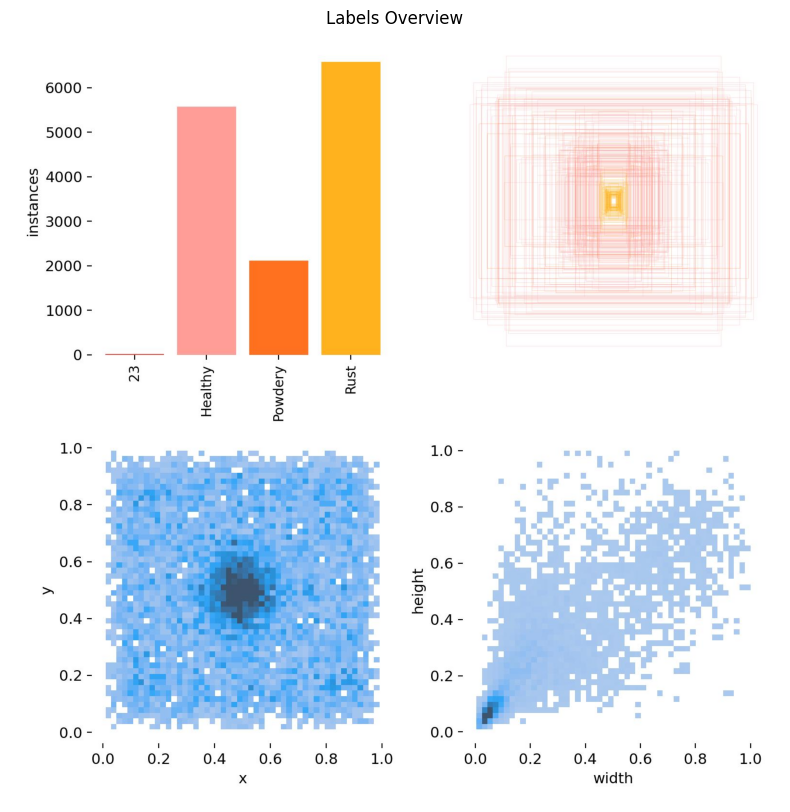

In [ ]:
# (6). Label Distribution
show_img("Labels Correlogram", f"{OUTPUT_DIR}/labels_correlogram.jpg")
show_img("Labels Overview", f"{OUTPUT_DIR}/labels.jpg")

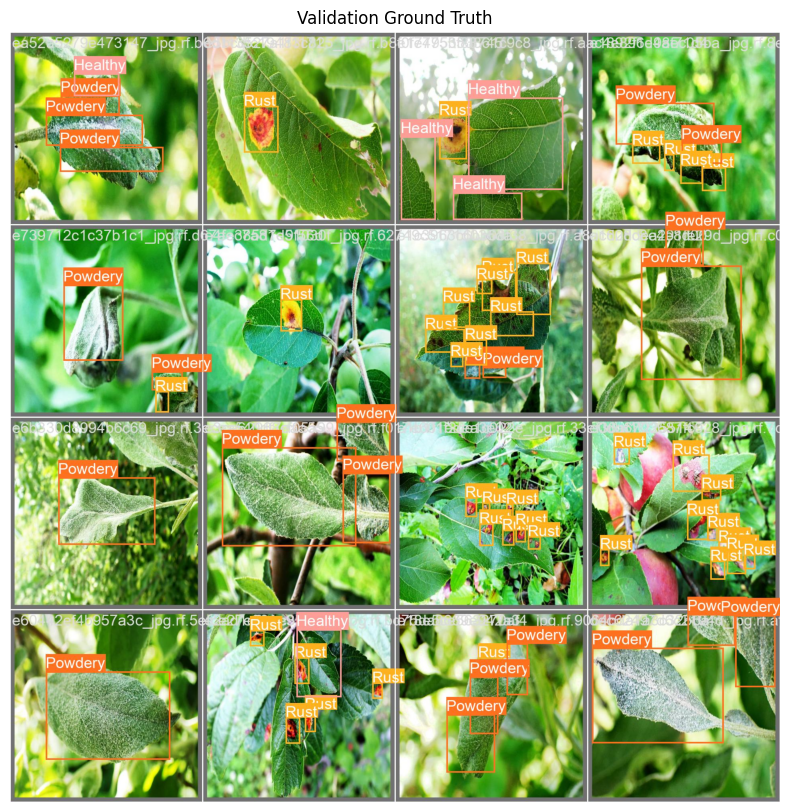

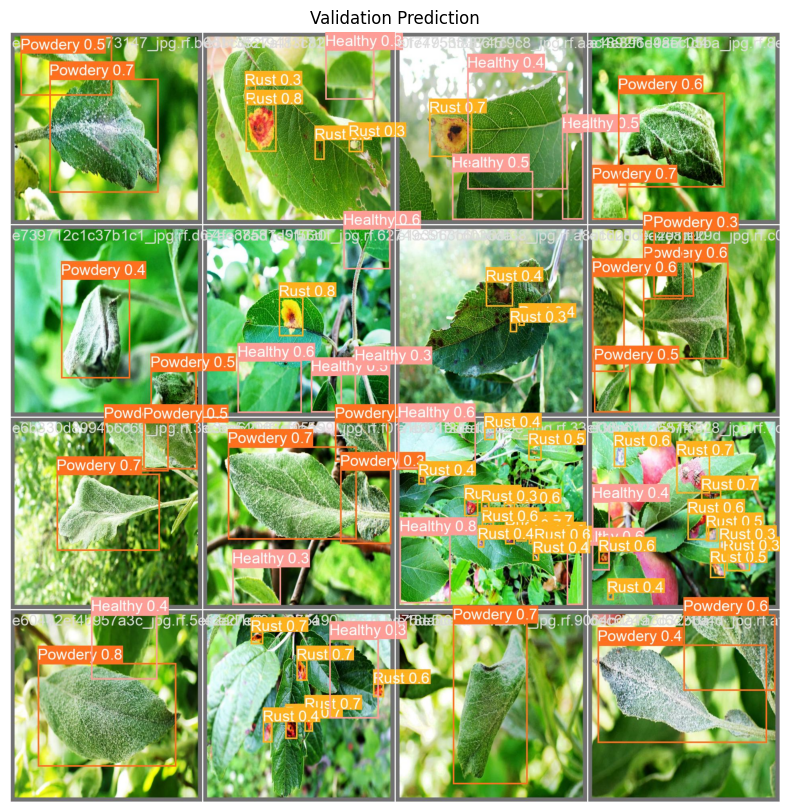

In [ ]:
# (7). Prediction Validation
show_img("Validation Ground Truth", f"{OUTPUT_DIR}/val_batch0_labels.jpg")
show_img("Validation Prediction", f"{OUTPUT_DIR}/val_batch0_pred.jpg")

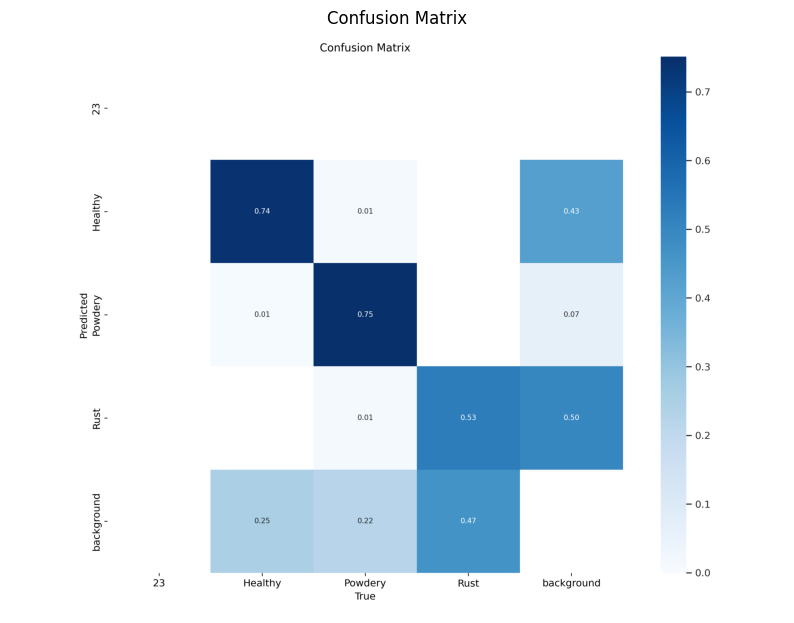

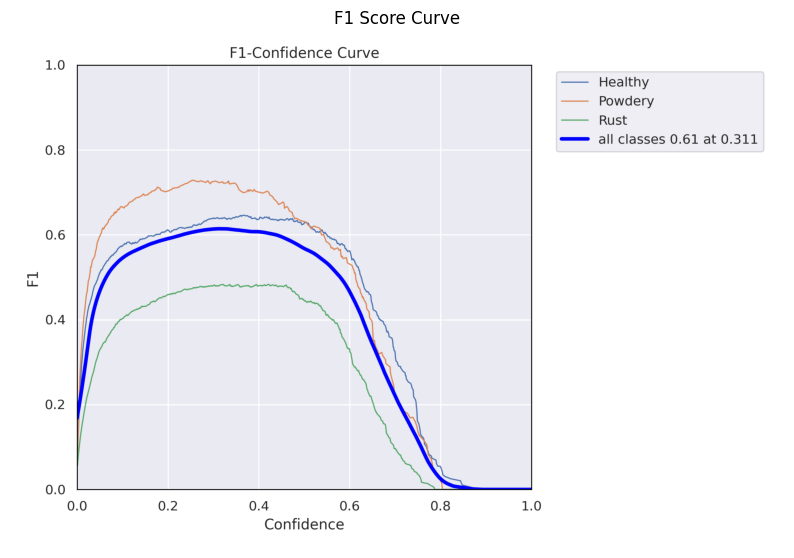

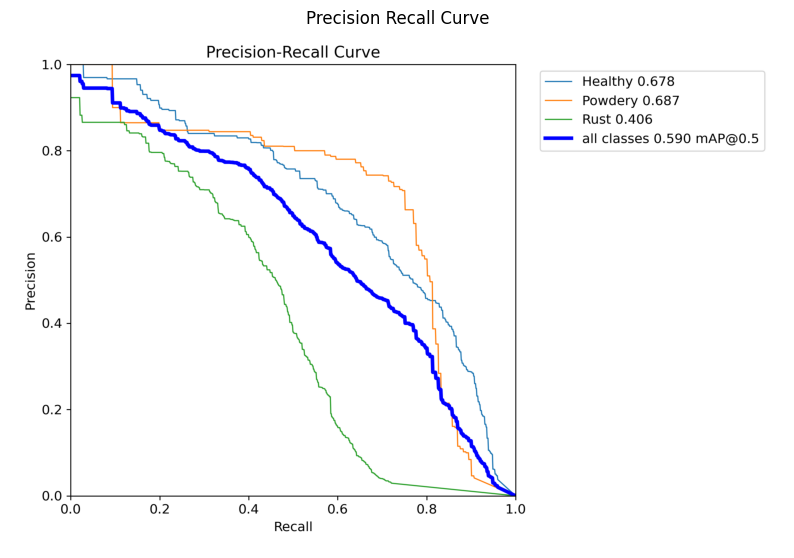

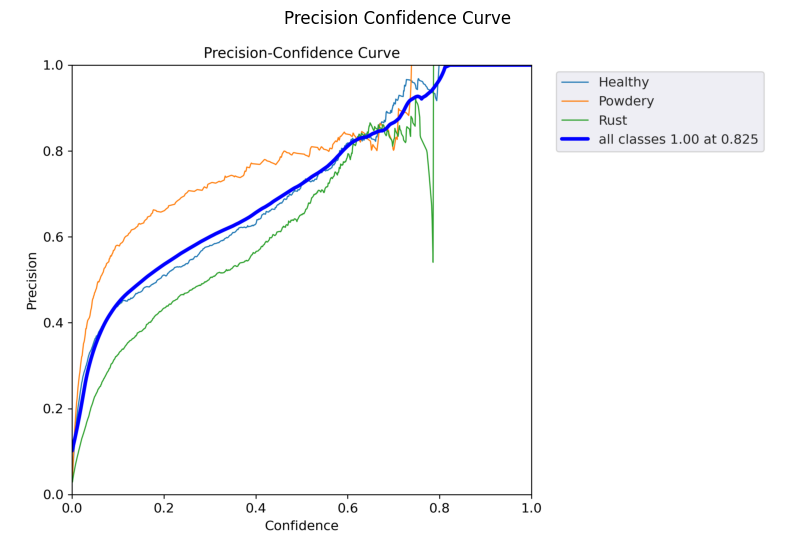

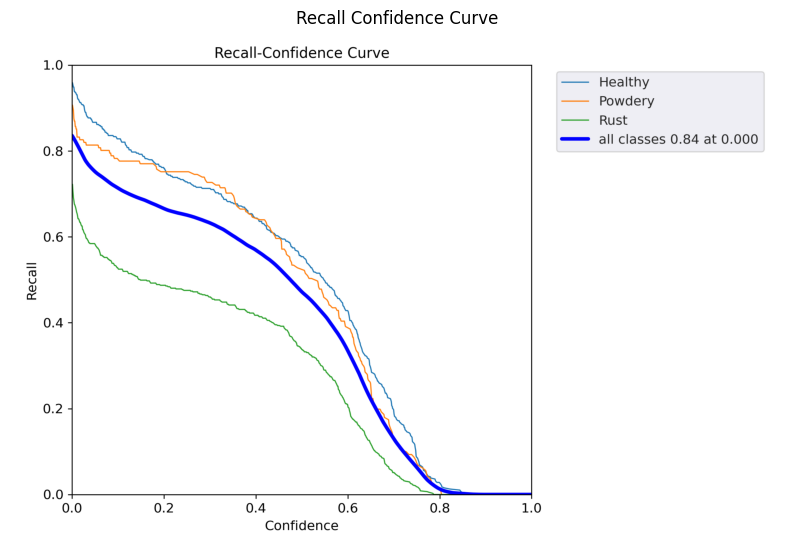

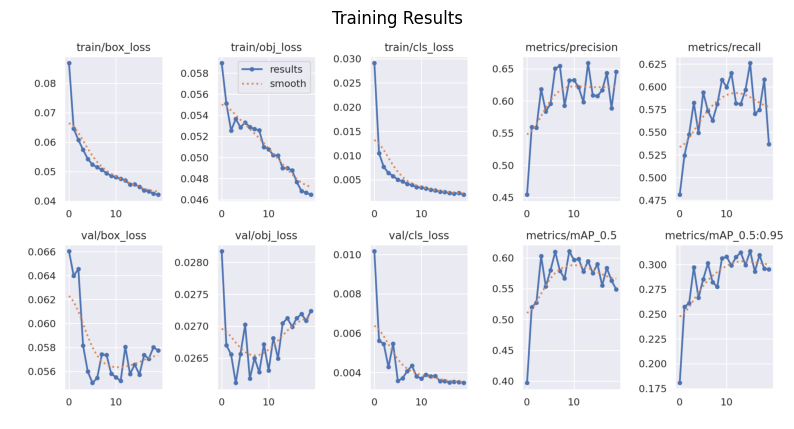

In [ ]:
# (8). Metrics & Curves
show_img("Confusion Matrix", f"{OUTPUT_DIR}/confusion_matrix.png")
show_img("F1 Score Curve", f"{OUTPUT_DIR}/F1_curve.png")
show_img("Precision Recall Curve", f"{OUTPUT_DIR}/PR_curve.png")
show_img("Precision Confidence Curve", f"{OUTPUT_DIR}/P_curve.png")
show_img("Recall Confidence Curve", f"{OUTPUT_DIR}/R_curve.png")
show_img("Training Results", f"{OUTPUT_DIR}/results.png")